In [30]:
# [Hamza, Munir]
# [Student number]
# [MMA]
# MMA 869
# [15/08/2020]


# Answer to Question 1, Part 1


In [2]:
#Loading Libraries 
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns 

from sklearn.metrics import silhouette_score, silhouette_samples
import sklearn.metrics
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture

import pandas_profiling

import itertools

import scipy

from yellowbrick.cluster import SilhouetteVisualizer, InterclusterDistance, KElbowVisualizer



from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# This will ensure that matplotlib figures don't get cut off when saving with savefig()
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


# Part (a). Load, Clean & Preprocess the Data

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/stepthom/sandbox/master/data/jewelry_customers.csv")

In [4]:
df_new = pd.read_csv("https://raw.githubusercontent.com/stepthom/sandbox/master/data/jewelry_customers.csv")

## Data Explorartion/Cleaning 

In [5]:
list(df)
df.shape
df.info()
df.describe().transpose()
df.head(n=20)
df.tail()

['Age', 'Income', 'SpendingScore', 'Savings']

(505, 4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            505 non-null    int64  
 1   Income         505 non-null    int64  
 2   SpendingScore  505 non-null    float64
 3   Savings        505 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 15.9 KB


,count,mean,std,min,25%,50%,75%,max
Age,505.0,59.019802,24.140043,17.0,34.000000,59.000000,85.000000,97.0
Income,505.0,75513.291089,35992.922184,12000.0,34529.000000,75078.000000,107100.000000,142000.0
SpendingScore,505.0,0.505083,0.259634,0.0,0.304792,0.368215,0.768279,1.0
Savings,505.0,11862.455867,4949.229253,0.0,6828.709702,14209.932802,16047.268331,20000.0


,Age,Income,SpendingScore,Savings
0,58,77769,0.791329,6559.829923
1,59,81799,0.791082,5417.661426
2,62,74751,0.702657,9258.992965
3,59,74373,0.765680,7346.334504
4,87,17760,0.348778,16869.507130
5,29,131578,0.847034,3535.514352
6,54,76500,0.785198,6878.884249
7,87,42592,0.355290,18086.287158
8,83,34384,0.324719,14783.379086
9,84,27693,0.367063,17879.558906


,Age,Income,SpendingScore,Savings
500,28,101206,0.387441,14936.775389
501,93,19934,0.203140,17969.693769
502,90,35297,0.355149,16091.401954
503,91,20681,0.354679,18401.088445
504,89,30267,0.289310,14386.351880


## Missing Value Analysis 

In [21]:
df.isnull().sum()

Age              0
Income           0
SpendingScore    0
Savings          0
dtype: int64

There are no missing values in the data set 

In [22]:
scaler = StandardScaler()
features = ['Income','Age','SpendingScore','Savings']
df[features] = scaler.fit_transform(df[features])

# Part (b). K-Means Clustering 

In [23]:
k_means = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state=0)
k_means.fit(df)
k_means.inertia_

KMeans(n_clusters=5, random_state=0)

66.51111374859076

In [24]:
k_means.labels_

array([1, 1, 1, 1, 2, 3, 1, 2, 2, 2, 4, 0, 0, 0, 1, 4, 1, 2, 2, 4, 0, 4,
       1, 2, 4, 3, 3, 1, 2, 1, 1, 1, 2, 1, 0, 1, 2, 1, 0, 0, 1, 2, 3, 1,
       1, 3, 4, 3, 0, 1, 2, 0, 3, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       2, 3, 3, 1, 1, 0, 2, 2, 0, 1, 0, 1, 1, 3, 1, 4, 1, 2, 2, 0, 0, 1,
       1, 1, 1, 1, 3, 2, 1, 3, 0, 1, 1, 0, 0, 3, 0, 3, 0, 2, 2, 0, 0, 1,
       2, 0, 1, 0, 0, 0, 1, 0, 3, 2, 0, 2, 2, 2, 0, 4, 1, 2, 1, 1, 0, 1,
       0, 1, 3, 2, 4, 3, 1, 0, 2, 1, 1, 3, 1, 3, 1, 4, 1, 2, 1, 0, 2, 1,
       2, 4, 0, 1, 2, 1, 0, 2, 1, 0, 2, 0, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1,
       1, 2, 2, 2, 1, 1, 0, 3, 3, 2, 0, 1, 1, 1, 0, 2, 1, 1, 1, 2, 3, 0,
       2, 2, 2, 0, 1, 0, 1, 0, 1, 2, 3, 1, 2, 2, 2, 2, 1, 2, 0, 3, 0, 2,
       1, 1, 0, 2, 0, 3, 0, 1, 1, 2, 1, 1, 2, 1, 1, 1, 0, 1, 0, 0, 3, 1,
       1, 1, 4, 1, 0, 2, 3, 3, 3, 2, 1, 0, 2, 2, 0, 0, 1, 1, 4, 1, 1, 2,
       1, 2, 0, 3, 1, 0, 2, 1, 2, 2, 0, 1, 2, 2, 1, 1, 2, 0, 0, 4, 0, 2,
       2, 0, 4, 2, 2, 3, 1, 0, 0, 1, 0, 2, 2, 0, 1,

In [25]:
# Let's look at the centers
k_means.cluster_centers_

array([[-1.08815238,  0.82744102, -0.75240648,  0.6270464 ],
       [ 0.03879611, -0.08524639,  1.02721559, -1.00569483],
       [ 1.19238486, -1.32510593, -0.67963841,  0.97016358],
       [-1.44466803,  1.46050665,  1.51057952, -1.57249636],
       [ 1.11876151,  1.23565419, -1.68367042,  0.59588052]])

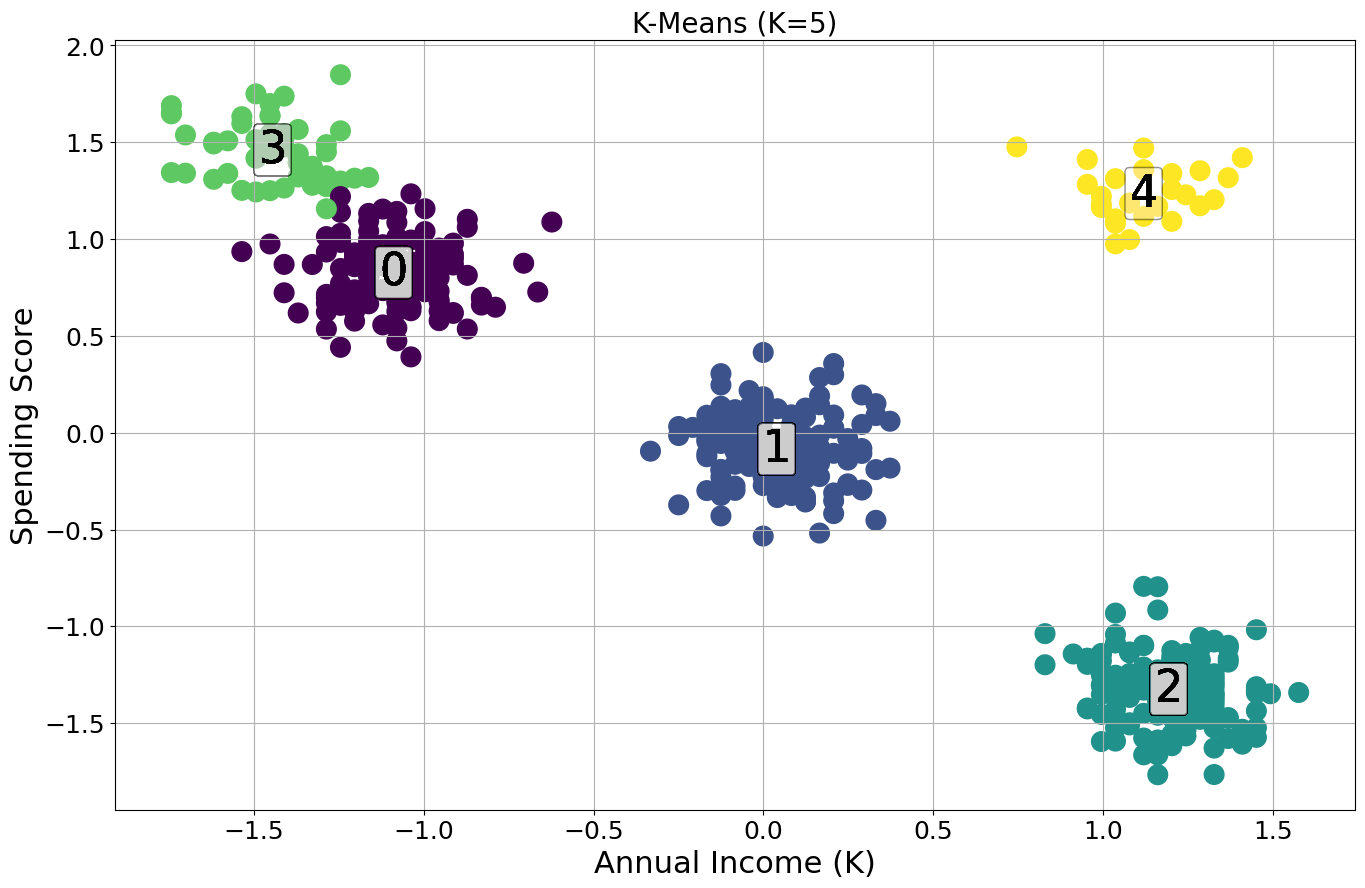

In [26]:
plt.style.use('default');

plt.figure(figsize=(16, 10));
plt.grid(True);

sc = plt.scatter(df.iloc[:, 0], df.iloc[:, 1], s=200, c=k_means.labels_);
#plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], marker='x', s=500, c="black")
plt.title("K-Means (K=5)", fontsize=20);
plt.xlabel('Annual Income (K)', fontsize=22);
plt.ylabel('Spending Score', fontsize=22);
plt.xticks(fontsize=18);
plt.yticks(fontsize=18);

for label in k_means.labels_:
    plt.text(x=k_means.cluster_centers_[label, 0], y=k_means.cluster_centers_[label, 1], s=label, fontsize=32, 
             horizontalalignment='center', verticalalignment='center', color='black',
             bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.1', alpha=0.02));

plt.savefig('C:/Users/User/Dropbox/My PC (DESKTOP-H6OTOPT)/Desktop/MMA_Courses/MMA 869/Individual assignment/j.png');

In [27]:
# WCSS == Inertia
k_means.inertia_

66.51111374859076

In [28]:
from sklearn.metrics import silhouette_score, silhouette_samples
silhouette_score(df, k_means.labels_)

0.8048976287755765

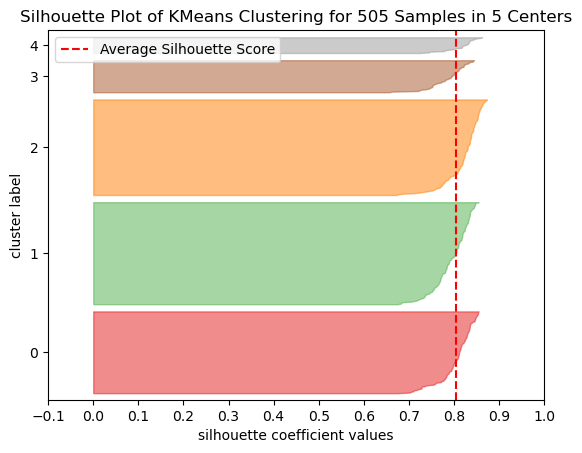

<Figure size 640x480 with 0 Axes>

In [29]:
from yellowbrick.cluster import SilhouetteVisualizer, InterclusterDistance, KElbowVisualizer

visualizer = SilhouetteVisualizer(k_means)
visualizer.fit(df)
visualizer.poof()

fig = visualizer.ax.get_figure()

plt.savefig('C:/Users/User/Dropbox/My PC (DESKTOP-H6OTOPT)/Desktop/MMA_Courses/MMA 869/Individual assignment/j.png');

## HyperParameter Tuning 

In [30]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df)
    distortions.append(kmeanModel.inertia_)

KMeans(n_clusters=1)

KMeans(n_clusters=2)

KMeans(n_clusters=3)

KMeans(n_clusters=4)

KMeans(n_clusters=5)

KMeans(n_clusters=6)

KMeans(n_clusters=7)

KMeans()

KMeans(n_clusters=9)

<Figure size 1600x800 with 0 Axes>

Text(0.5, 0, 'k')

Text(0, 0.5, 'Distortion')

Text(0.5, 1.0, 'The Elbow Method showing the optimal k')

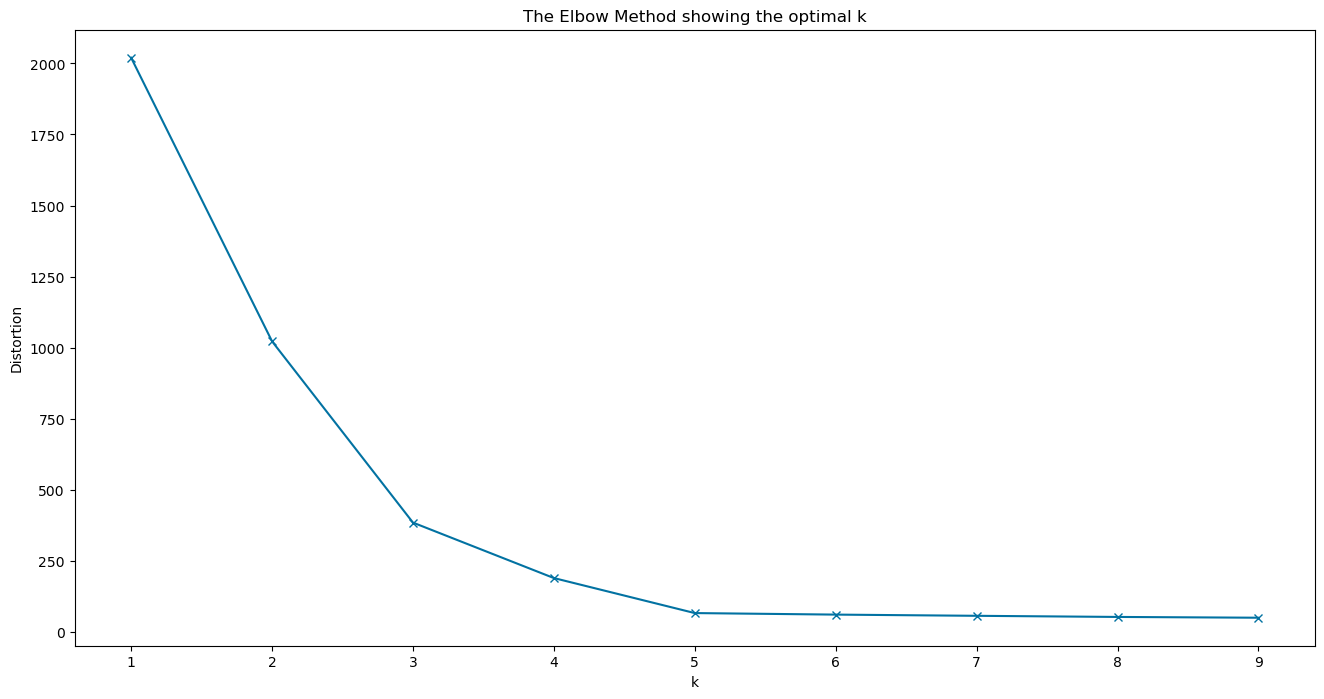

In [31]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')


In [32]:
import tkinter as tk

# Part (c) Summary Statistics for Each Class 

In [33]:
from scipy.spatial import distance

for i, label in enumerate(set(k_means.labels_)):    
    X_tmp = df[k_means.labels_==label].copy()
    
    exemplar_idx = distance.cdist([k_means.cluster_centers_[i]], X_tmp).argmin()
    exemplar = pd.DataFrame(X_tmp.iloc[exemplar_idx])
   
    print('\nCluster {}:'.format(label))
    exemplar


Cluster 0:


,405
Age,-1.037472
Income,0.770100
SpendingScore,-0.786483
Savings,0.664874



Cluster 1:


,467
Age,0.082111
Income,-0.096957
SpendingScore,0.991771
Savings,-0.998383



Cluster 2:


,335
Age,1.243160
Income,-1.350862
SpendingScore,-0.690416
Savings,0.949109



Cluster 3:


,95
Age,-1.410666
Income,1.541294
SpendingScore,1.575637
Savings,-1.601849



Cluster 4:


,155
Age,1.118762
Income,1.117318
SpendingScore,-1.724288
Savings,0.594762


In [34]:
for label in set(k_means.labels_):
    print('\nCluster {}:'.format(label))
    X_tmp = df[k_means.labels_==label].copy()
    X_tmp.loc['mean'] = X_tmp.mean()
    X_tmp.tail(13)


Cluster 0:


,Age,Income,SpendingScore,Savings
454,-1.161870,0.901590,-0.504442,0.069791
457,-0.996006,0.962051,-0.841685,0.619312
460,-1.286268,0.697459,-0.946440,0.739818
461,-1.078938,1.143099,-0.709982,0.655710
463,-1.286268,0.535322,-0.776811,0.705873
468,-1.120404,1.155169,-0.746896,0.495131
471,-1.161870,0.714618,-0.774009,1.022407
476,-1.078938,0.868912,-0.951075,0.519625
477,-1.078938,0.878451,-0.627070,0.613434
482,-1.120404,0.915078,-0.839366,0.977675



Cluster 1:


,Age,Income,SpendingScore,Savings
467,0.082111,-0.096957,0.991771,-0.998383
469,0.165043,-0.137199,1.007903,-0.930429
470,-0.042287,-0.134529,0.998339,-0.849062
472,0.123577,-0.051124,1.123989,-1.450915
473,0.040645,-0.334767,0.951579,-0.873509
474,0.123577,-0.216432,1.210931,-1.194480
478,0.247975,-0.141370,0.739895,-0.989273
479,-0.000821,-0.169793,1.445093,-1.086232
480,0.247975,-0.119150,1.090334,-0.574015
491,-0.042287,-0.143067,1.539992,-0.890089



Cluster 2:


,Age,Income,SpendingScore,Savings
485,1.284626,-1.466499,-0.573590,0.821470
486,1.326092,-1.316793,-0.776438,1.132151
488,1.367558,-1.579355,-0.683255,0.703620
489,1.574888,-1.341656,-0.852659,0.620046
490,1.035829,-1.086019,-0.583946,0.950770
493,1.367558,-1.098006,-0.648148,1.109584
494,1.160228,-1.268291,-0.628164,1.270098
497,1.326092,-1.244736,-0.776418,0.734084
501,1.409024,-1.545704,-1.164109,1.235201
502,1.284626,-1.118447,-0.578054,0.855313



Cluster 3:


,Age,Income,SpendingScore,Savings
406,-1.410666,1.263825,1.436486,-1.268526
412,-1.576530,1.507698,1.722243,-1.478797
415,-1.369200,1.394675,1.625959,-1.167596
442,-1.742394,1.689275,1.660880,-1.564668
445,-1.452132,1.250143,1.551423,-1.420640
451,-1.327734,1.311493,1.561530,-1.548476
456,-1.742394,1.343670,1.684540,-1.630882
458,-1.286268,1.451326,1.450948,-1.288677
466,-1.700928,1.340611,1.162288,-1.505162
487,-1.369200,1.320782,1.848446,-1.515115



Cluster 4:


,Age,Income,SpendingScore,Savings
283,1.284626,1.353181,-1.828737,0.588746
288,0.994363,1.163428,-1.347032,0.652110
311,1.077295,1.186289,-1.472325,0.605440
312,1.201694,1.091677,-1.823122,1.207573
343,1.035829,1.104748,-1.682128,0.512529
351,1.326092,1.203671,-1.873225,0.441907
353,0.745567,1.476272,-1.789902,0.534138
368,1.035829,0.975288,-1.642530,0.622034
383,1.160228,1.169463,-1.452726,0.432373
414,1.201694,1.338748,-1.835384,0.332122


In [35]:
df_new['Clusters']= k_means.labels_

In [36]:
df_new

,Age,Income,SpendingScore,Savings,Clusters
0,58,77769,0.791329,6559.829923,1
1,59,81799,0.791082,5417.661426,1
2,62,74751,0.702657,9258.992965,1
3,59,74373,0.765680,7346.334504,1
4,87,17760,0.348778,16869.507130,2
...,...,...,...,...,...
500,28,101206,0.387441,14936.775389,0
501,93,19934,0.203140,17969.693769,2
502,90,35297,0.355149,16091.401954,2
503,91,20681,0.354679,18401.088445,2


In [37]:
df_new.groupby('Clusters').describe().transpose()

Clusters                         0             1             2              3  \
Age           count     126.000000    157.000000    147.000000      50.000000   
              mean       32.777778     59.955414     87.775510      24.180000   
              std         3.792390      3.376662      3.508885       3.662775   
              min        22.000000     51.000000     79.000000      17.000000   
              25%        30.000000     58.000000     85.000000      22.000000   
              50%        33.000000     59.000000     88.000000      24.500000   
              75%        35.000000     62.000000     91.000000      27.000000   
              max        44.000000     68.000000     97.000000      31.000000   
Income        count     126.000000    157.000000    147.000000      50.000000   
              mean   105265.809524  72448.063694  27866.102041  128029.120000   
              std      6080.621753   6240.260008   6448.805481    5688.904656   
              min     89598.000000  56321.000000  12000.000000  117108.000000   
              25%    100760.250000  68463.000000  23361.000000  123042.000000   
              50%    106002.500000  72027.000000  27771.000000  128162.000000   
              75%    108858.750000  76594.000000  32601.000000  131435.750000   
              max    119877.000000  90422.000000  46977.000000  142000.000000   
SpendingScore count     126.000000    157.000000    147.000000      50.000000   
              mean        0.309926      0.771518      0.328800       0.896892   
              std         0.045513      0.046058      0.045224       0.043466   
              min         0.174120      0.657314      0.203140       0.806553   
              25%         0.281237      0.740367      0.301502       0.871957   
              50%         0.309479      0.766720      0.324719       0.890676   
              75%         0.341096      0.800598      0.357267       0.926473   
              max         0.411112      0.910417      0.473550       1.000000   
Savings       count     126.000000    157.000000    147.000000      50.000000   
              mean    14962.778066   6889.972190  16659.261445    4087.520309   
              std      1061.734017   1052.276354   1183.850178    1277.754801   
              min     12207.526078   4077.658657  13470.970605       0.000000   
              25%     14223.787562   6225.376082  15957.282919    3275.320193   
              50%     14976.943192   6845.056822  16711.067980    4361.967019   
              75%     15682.288845   7497.231607  17433.126684    4986.863329   
              max     17968.553929  10547.775368  20000.000000    6089.478323   

Clusters                         4  
Age           count      25.000000  
              mean       86.000000  
              std         3.662877  
              min        77.000000  
              25%        84.000000  
              50%        86.000000  
              75%        88.000000  
              max        93.000000  
Income        count      25.000000  
              mean   119944.040000  
              std      4941.052254  
              min    110582.000000  
              25%    117347.000000  
              50%    119429.000000  
              75%    123651.000000  
              max    128596.000000  
SpendingScore count      25.000000  
              mean        0.068378  
              std         0.039744  
              min         0.000000  
              25%         0.036795  
              50%         0.063273  
              75%         0.082723  
              max         0.155694  
Savings       count      25.000000  
              mean    14808.683793  
              std      1159.339639  
              min     12554.692742  
              25%     14047.388986  
              50%     14773.407206  
              75%     15391.952192  
              max     17833.093470